In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
small =15
med = 18
big = 22

plt.rc('font', size=med)
plt.rc('axes', titlesize=big)
plt.rc('axes', labelsize=med)
plt.rc('xtick', labelsize=small)
plt.rc('ytick', labelsize=small)
plt.rc('legend', fontsize=small)
plt.rc('figure', titlesize=big)

In [3]:
events = pd.read_csv('meetups-data-from-meetupcom/events.csv',
                     usecols=['event_id', 'created', 'fee.amount', 'group_id', 'group.name',
                              'event_name', 'venue.city', 'venue.name', 'yes_rsvp_count'],
                     date_parser=["created"])
events.dropna(inplace = True)
sep = ','
events['venue.city'] = events['venue.city'].apply(lambda x:x.split(sep, 1)[0].lower().replace(' city', ''))
events['venue.city'] = events['venue.city'].astype('category')

groups = pd.read_csv('meetups-data-from-meetupcom/groups.csv', usecols=['group_id', 'category_id', 'category.name'])
groups.head()

,group_id,category_id,category.name
0,6388,14,health/wellbeing
1,6510,4,community/environment
2,8458,26,pets/animals
3,8940,29,sci-fi/fantasy
4,10104,26,pets/animals


In [27]:
df = pd.merge(events, groups, left_on='group_id', right_on='group_id', how='left')
df['group_id'] = df['group_id'].astype('str')
df['category_id'] = df['category_id'].astype('str')
df_0 = df[(df != 0).all(1)]
df.head()

,event_id,created,fee.amount,group_id,group.name,event_name,venue.city,venue.name,yes_rsvp_count,category_id,category.name
0,153868222,2013-12-03 21:24:29,0.0,5817262,San Francisco Startup Socials,Murder Mystery Dinner Crawl. Dine at 3 Restaur...,san francisco,Little Szechuan,72,2,career/business
1,184167702,2014-05-20 18:52:00,0.0,1627081,HR & Tech SF,Friday Night Drinks with International Travele...,san francisco,Horizon Lounge,179,2,career/business
2,215200502,2014-10-23 16:18:44,0.0,1627081,HR & Tech SF,"Dinner, Comedy, 100 Beers & Debauchery!",san francisco,taste of vietnam noodle bar,45,2,career/business
3,220826782,2015-02-28 19:27:32,0.0,5817262,San Francisco Startup Socials,Friday Night Drinks,san francisco,Horizon,198,2,career/business
4,227948102,2016-01-08 21:35:40,0.0,1627081,HR & Tech SF,AUSTRALIA DAY PARTY & Sausage Sizzle! $3 Beer/...,san francisco,Score! Bar and Lounge,24,2,career/business


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5757 entries, 0 to 5756
Data columns (total 11 columns):
event_id          5757 non-null object
created           5757 non-null object
fee.amount        5757 non-null float64
group_id          5757 non-null object
group.name        5757 non-null object
event_name        5757 non-null object
venue.city        5757 non-null category
venue.name        5757 non-null object
yes_rsvp_count    5757 non-null int64
category_id       5757 non-null object
category.name     5757 non-null object
dtypes: category(1), float64(1), int64(1), object(8)
memory usage: 660.5+ KB


In [8]:
df.columns

Index(['event_id', 'created', 'fee.amount', 'group_id', 'group.name',
       'event_name', 'venue.city', 'venue.name', 'yes_rsvp_count',
       'category_id', 'category.name'],
      dtype='object')

In [9]:
df.describe()

,fee.amount,yes_rsvp_count
count,1009.000000,1009.000000
mean,21.099861,3.905847
std,20.958030,11.760088
min,1.000000,1.000000
25%,10.000000,1.000000
50%,15.000000,1.000000
75%,15.000000,2.000000
max,95.000000,158.000000


## Venue

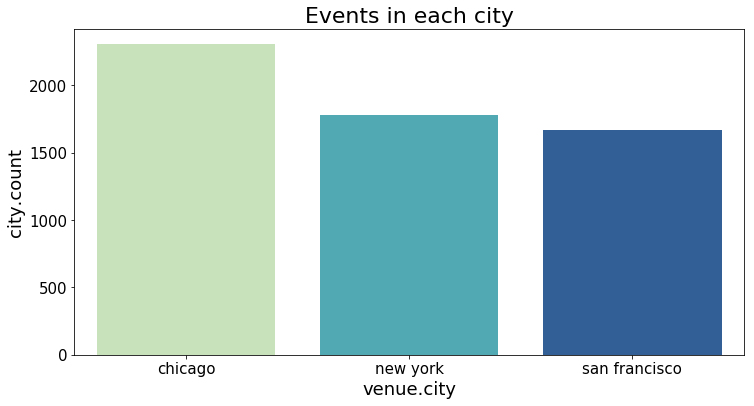

In [8]:
title = 'Events in each city'
plt.figure(figsize=(12,6))
ax = sns.barplot(x='venue.city', y='city.count', data=df.groupby('venue.city').size().reset_index(name = 'city.count').sort_values('city.count', ascending = False)
, palette="YlGnBu")
ax.set_title(title)
plt.savefig(title + '.png', dpi=300)
plt.show()

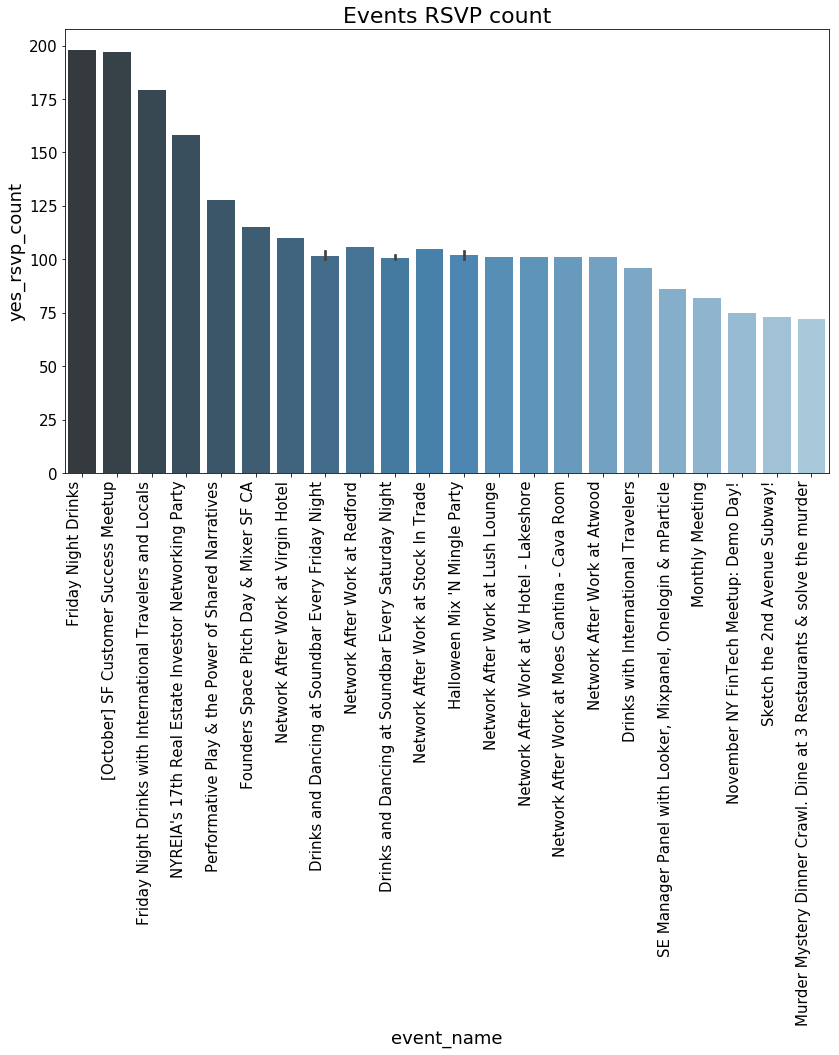

In [9]:
title = 'Events RSVP count'
plt.figure(figsize=(12,15))
ax = sns.barplot(x='event_name', y='yes_rsvp_count', data=df.sort_values('yes_rsvp_count', ascending=False).head(40),
                 palette=("Blues_d"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha = "right")
ax.set_title(title)
plt.tight_layout()
plt.savefig(title + '.png', dpi=300)

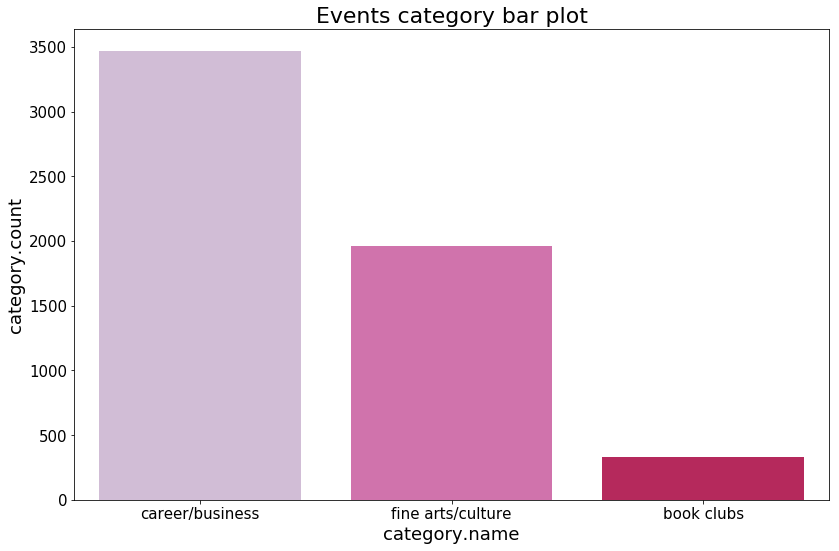

In [20]:
title = 'Events category bar plot'
plt.figure(figsize=(12,8))
ax = sns.barplot(x='category.name', y='category.count', data=df.groupby('category.name').size().reset_index(name = 'category.count').sort_values('category.count', ascending = False),
                 palette=("PuRd"))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha = "right")
ax.set_title(title)
plt.tight_layout()
plt.savefig(title + '.png', dpi=300)

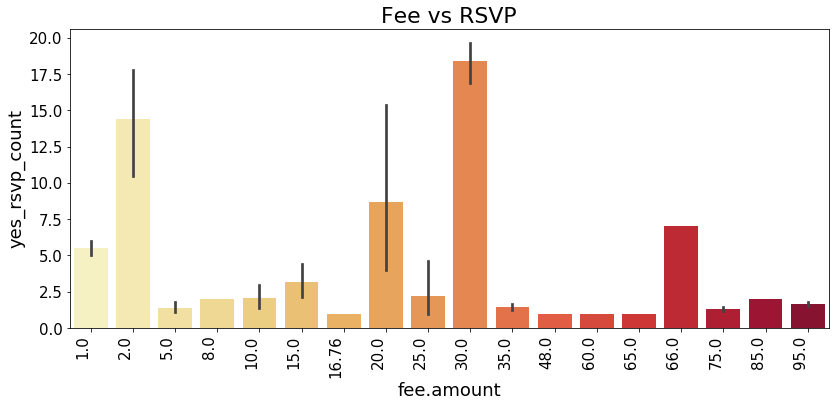

In [10]:
title = 'Fee vs RSVP'
plt.figure(figsize=(12,6))
ax = sns.barplot(x='fee.amount', y='yes_rsvp_count', data=df, palette="YlOrRd")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha = "right")
ax.set_title(title)
plt.tight_layout()
plt.savefig(title + '.png', dpi=300)
plt.show()

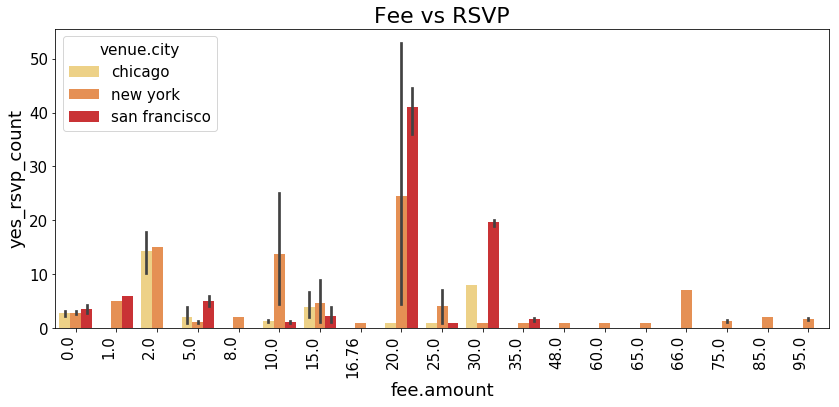

In [16]:
title = 'Fee vs RSVP'
plt.figure(figsize=(12,6))
ax = sns.barplot(x='fee.amount', y='yes_rsvp_count', data=df, palette="YlOrRd", hue='venue.city')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha = "right")
ax.set_title(title)
plt.tight_layout()
plt.savefig(title + '.png', dpi=300)
plt.show()

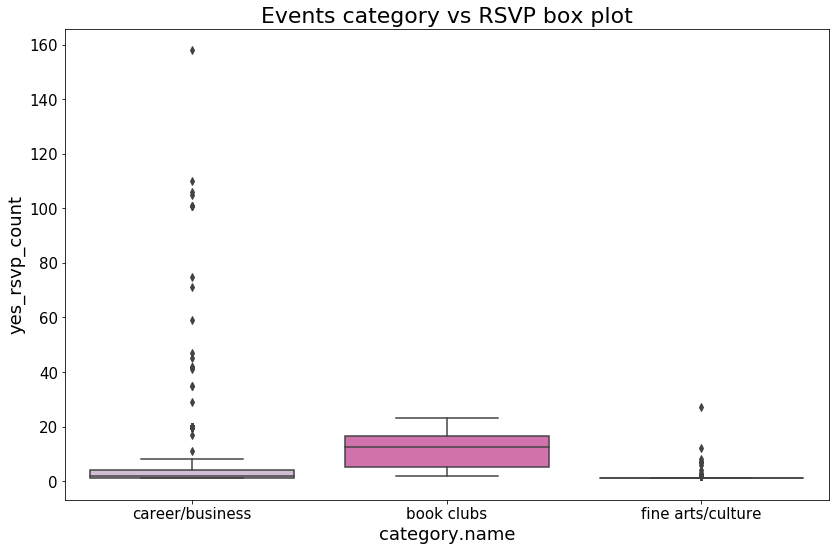

In [12]:
title = 'Events category vs RSVP box plot'
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='category.name', y='yes_rsvp_count', data=df,
                 palette=("PuRd"))
ax.set_title(title)
plt.tight_layout()
plt.savefig(title + '.png', dpi=300)

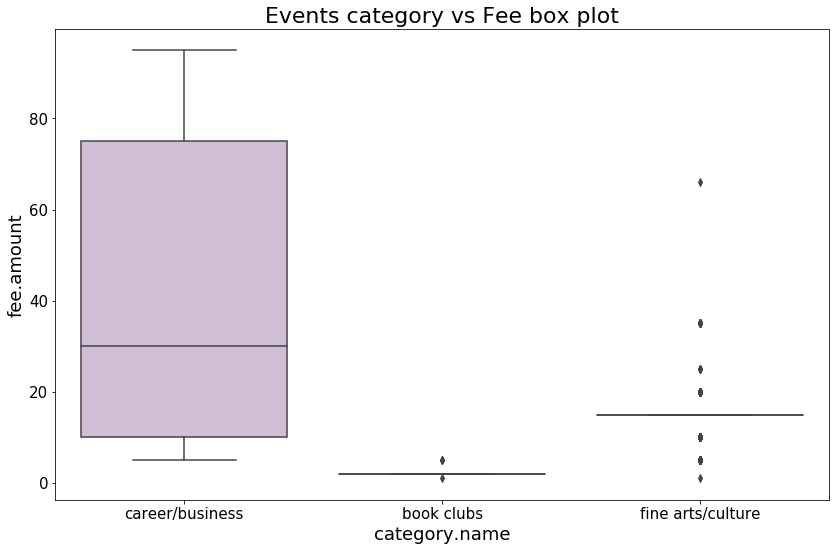

In [13]:
title = 'Events category vs Fee box plot'
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='category.name', y='fee.amount', data=df,
                 palette=("PuRd"))
ax.set_title(title)
plt.tight_layout()
plt.savefig(title + '.png', dpi=300)

https://datascienceplus.com/seaborn-categorical-plots-in-python/

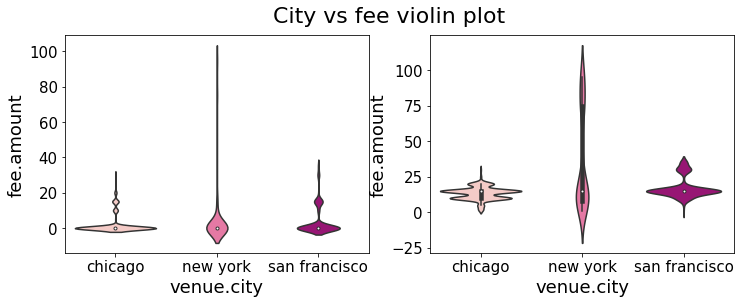

In [44]:
title = 'City vs fee violin plot'
f, axes = plt.subplots(1, 2, figsize=(12,4))
f.suptitle(title)
sns.violinplot(x='venue.city', y='fee.amount', data=df, palette="RdPu", ax=axes[0], title='one')
sns.violinplot(x='venue.city', y='fee.amount', data=df_0, palette="RdPu", ax=axes[1])
plt.savefig(title + '.png', dpi=300)
plt.show()

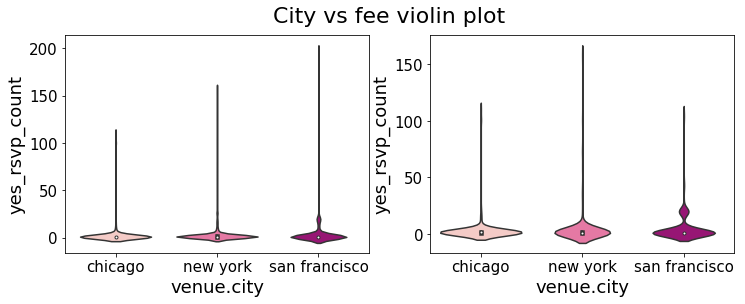

In [46]:
title = 'City vs fee violin plot'
f, axes = plt.subplots(1, 2, figsize=(12,4))
f.suptitle(title)
sns.violinplot(x='venue.city', y='yes_rsvp_count', data=df, palette="RdPu", ax=axes[0], title='one')
sns.violinplot(x='venue.city', y='yes_rsvp_count', data=df_0, palette="RdPu", ax=axes[1])
plt.savefig(title + '.png', dpi=300)
plt.show()

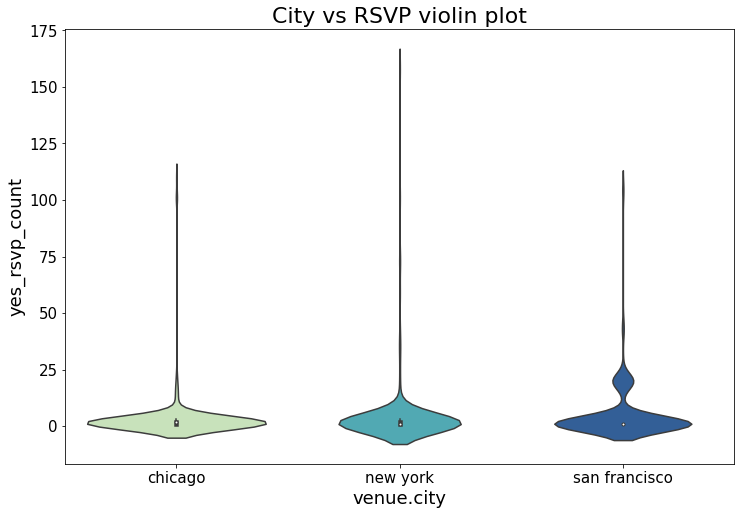

In [25]:
title = 'City vs RSVP violin plot'
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='venue.city', y='yes_rsvp_count', data=df, palette="YlGnBu")
ax.set_title(title)
plt.savefig(title + '.png', dpi=300)
plt.show()

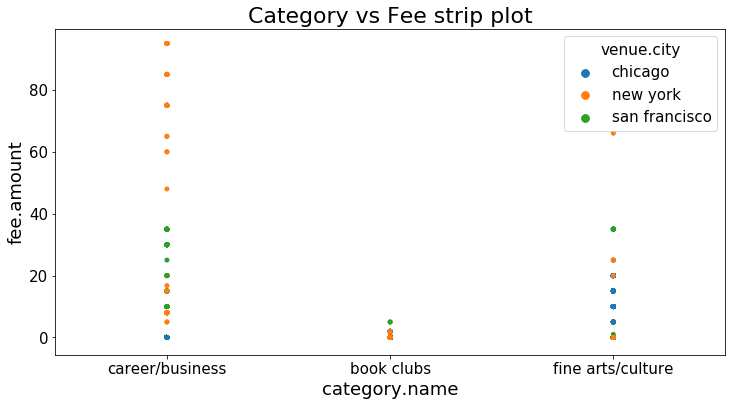

In [51]:
title = 'Category vs Fee strip plot'
plt.figure(figsize=(12,6))
ax = sns.stripplot(x='category.name', y='fee.amount', hue='venue.city', data=df)
ax.set_title(title)
plt.savefig(title + '.png', dpi=300)
plt.show()

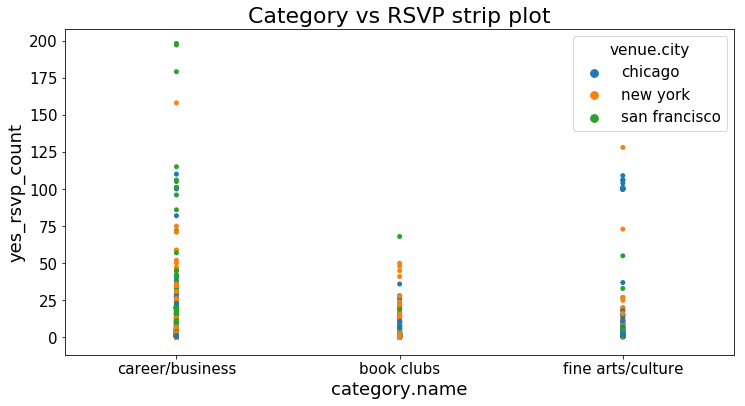

In [52]:
title = 'Category vs RSVP strip plot'
plt.figure(figsize=(12,6))
ax = sns.stripplot(x='category.name', y='yes_rsvp_count', hue='venue.city', data=df)
ax.set_title(title)
plt.savefig(title + '.png', dpi=300)
plt.show()

## Plot

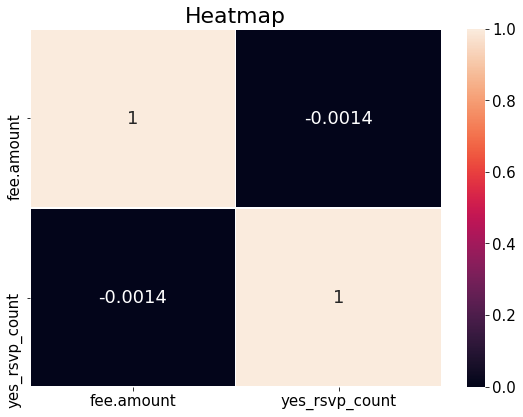

In [19]:
title = 'Heatmap'
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, linewidth=0.5)
plt.tight_layout()
plt.title(title)
plt.savefig(title + '.png', dpi=400)
plt.show()

http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python

In [18]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for RSVP, {1}".format(colX, self.p)
        else:
            result="{0} is NOT an important RSVP, {1}".format(colX, self.p)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
# testColumns = ['event_id', 'created', 'fee.amount', 'group_id', 'group.name',
#        'event_name', 'venue.city', 'venue.name', 'yes_rsvp_count',
#        'category_id', 'category.name']
testColumns = events.columns
for var in testColumns:
    cT.TestIndependence(colX=var,colY="yes_rsvp_count" )  

event_id is NOT an important RSVP, 0.4690710293637331
created is IMPORTANT for RSVP, 0.0
fee.amount is IMPORTANT for RSVP, 0.0
group_id is IMPORTANT for RSVP, 0.0
group.name is IMPORTANT for RSVP, 0.0
event_name is IMPORTANT for RSVP, 0.0
venue.city is IMPORTANT for RSVP, 5.478649329819901e-158
venue.name is IMPORTANT for RSVP, 0.0
yes_rsvp_count is IMPORTANT for RSVP, 0.0


ValueError: color kwarg must have one color per data set. 5757 data sets and 1 colors were provided

<Figure size 1080x1080 with 0 Axes>

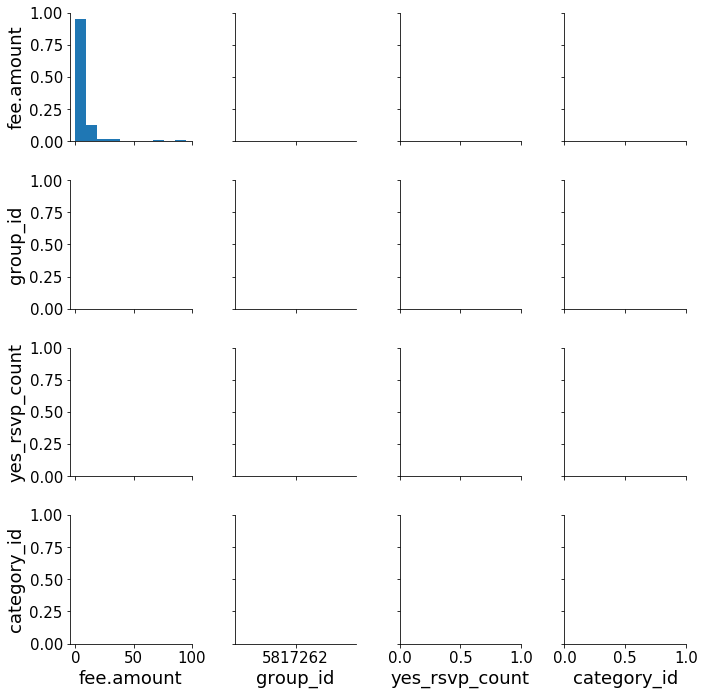

In [19]:
title = 'Pairplot'
ax.set_title(title)
plt.figure(figsize=(15,15))
sns.pairplot(df, kind="reg")
plt.suptitle(title, y=1.0)
plt.tight_layout()
plt.savefig(title + '.png', dpi=400)
plt.show()

In [ ]:
title = 'Pairplot with hue'
sns.pairplot(df[['fee.amount', 'yes_rsvp_count']], hue = 'venue.city')
plt.suptitle(title, y=1.0)
plt.tight_layout()
plt.savefig(title + '.png', dpi=400)

In [ ]:
title = 'Pairplot with density'
sns.pairplot(df, hue = 'venue.city', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)
plt.suptitle(title, y=1.0)
plt.tight_layout()
plt.savefig(title + '.png', dpi=400)